# Statistic Inference

Statistic inference can be divided into two main categories:

- Point estimation - estimating some parameter with a single value
- Interval estimation - estimating some parameter with an interval

We are going to consider both of these categories, using the following example:

---
John wants to find out how he performed on the Maths test compared to the whole school year. His school year consists of a total of 400 students, but John cannot go and ask each one of them, so instead he asked 20 people he randomly met in school about their test scores.

---

Let us first prepare our data. We will use the dataset at `data/math-scores.csv`.

In [172]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as sps

POPULATION_SIZE = 400
population = pd.read_csv('../../data/math-scores.csv', header=None).to_numpy().reshape(-1)
population_mean = np.mean(population)
population_variance = np.var(population)
print(f"Mean: {population_mean}\nVariance: {population_variance}")

Mean: 68.4375
Variance: 180.47109375


Now let's get John's sample:

In [30]:
SAMPLE_SIZE = 20
sample = np.random.choice(population, SAMPLE_SIZE)

And now let's get another set of samples, which we will use to show the precision in estimating the mean and variance:

In [173]:
N_SAMPLES = int(1e4)
samples = np.random.choice(population, (N_SAMPLES, SAMPLE_SIZE))

## Point Inference

### Inferring the Population Mean

Recall that we can treat all the samples as i.i.d. variables $X_1...X_{20}$. Thus the sample mean $\overline{X}$ is also a random variable. We proved earlier that:

$$
E(\overline{X}) = \mu \\
$$

The property that an estimator's expected value matches the population parameter is called **unbiasedness** and the estimator is called an **unbiased estimator**.

Let us take a look at the expectation of the mean of all the extra samples we took earlier:

In [80]:
print(f"Expectation of sample mean: {np.mean(np.mean(samples, axis=1))}")
print(f"Population Mean           : {population_mean}")

Expectation of sample mean: 68.41863000000001
Population Mean           : 68.4375


We can see that $E(\overline{X})$ is unbiased.

---
Another property we want an estimator to have is **consistency**. An estimator is **consistent** if it converges to the parameter it's estimating when the sample size increases. If we take a sample of size 10000:

In [81]:
print(f"Mean of small sample: {np.mean(np.random.choice(population, 20))}")
print(f"Mean of large sample: {np.mean(np.random.choice(population, 10000))}")
print(f"Population Mean     : {population_mean}")

Mean of small sample: 70.85
Mean of large sample: 68.4
Population Mean     : 68.4375


We see that the sample mean is consistent.

### Inferring the Population Variance

It is natural to think that the sample variance is a good estimate of the population variance. However, let us check the expectation of the sample variance:

In [84]:
print(f"Expectation of sample variance: {np.mean(np.var(samples, axis=1))}")
print(f"Population Variance           : {population_variance}")


Expectation of sample variance: 171.2062235
Population Variance           : 180.47109375


It seems to be quite different from the population variance.

The reason this happens, is because when calculating the sample variance, we are actually using $\overline{X}$ as the mean, instead of $\mu$. That is, in our previous formula, we had:

$$
\begin{aligned}
S^2 &= \frac{1}{n}\sum{(X_i - \overline{X})^2} \\
&= \frac{1}{n}\sum{((X_i - \mu) - (\overline{X} - \mu))^2} \\
&= \frac{1}{n}\bigg[ \sum{(X_i - \mu)^2} - 2(\overline{X} - \mu)\sum{(X_i - \mu)} + n(\overline{X} - \mu)^2 \bigg]
\end{aligned}
$$


Here, we observe that:

$$
\overline{X} - \mu = \frac{1}{n}\sum{X_i} - \mu = \frac{1}{n}\sum{(X_i - \mu)}
$$

Plugging this into the above formula, we get:

$$
\begin{aligned}
S^2 &= \frac{1}{n}\bigg[ \sum{(X_i - \mu)^2} - 2n(\overline{X} - \mu)^2 + n(\overline{X} - \mu)^2 \bigg] \\
&= \frac{1}{n}\bigg[ \sum{(X_i - \mu)^2} - n(\overline{X} - \mu)^2 \bigg] \\
&= \frac{1}{n}\sum{(X_i - \mu)^2} - (\overline{X} - \mu)^2
\end{aligned}
$$

Now when we take the expectation, we get:

$$
\begin{aligned}
E(S^2) &= \frac{1}{n}\sum{E[(X_i - \mu)^2]} - E[(\overline{X} - \mu)^2]
\end{aligned}
$$

We know that:

$$
E[(\overline X - \mu)^2] = V(\overline{X}) = \frac{\sigma^2}{n} \\
E[(X_i - \mu)^2] = \sigma^2
$$

Therefore:

$$
E(S^2) = \sigma^2 - \frac{\sigma^2}{n} = \frac{n - 1}{n}\sigma^2
$$

Thus we can see that $E(S^2)$ is actually smaller than the population variance, which makes $S^2$ a **biased estimator**. Because of this, we introduce a new estimator called the **unbiased variance**, which we define as:

$$
s^2 = \frac{1}{n-1}\sum{(X - \overline{X})^2}
$$

where:

$$
E(s^2) = \frac{1}{n-1}\sum{E[(X - \overline{X})^2]} = \frac{n}{n-1}\frac{1}{n}\sum{E[(X - \overline{X})^2]} = \frac{n}{n-1} S^2
$$

which is the corrected sample variance. This correction is called **Bessel's correction**.

The unbiased variance is said to have $n-1$ **degrees of freedom**. This means that $n - 1$ of the variables involved are free to take any value. The reason it has $n - 1$ and not $n$ degrees of freedom is that, in order for the following equality to hold:

$$
\frac{1}{n}\sum{X_i} = \overline{X}
$$

one must only know $n - 1$ of the values of $X_i$ - the $n$th value is automatically determined from the equality.

## Interval Estimation

Let us consider the case of estimating the population mean of a normal distribution with variance $\sigma^2$.

We know that the sample mean obeys a $N(\mu, \frac{\sigma^2}{n})$.  The standard deviation of this distribution is $\frac{\sigma}{\sqrt{n}}$. This is called the **standard error**. In our case, we know the variance, so we can calculate the standard error and standardize the distribution, giving us:

$$
Z = \frac{\overline{X} - \mu}{\sigma^2 / \sqrt{n}} \sim N(0, 1)
$$

Now we can calculate the $100(1-\alpha)\%$ interval. Concretely, let us consider the $95\%$ interval:

$$
P(z_{0.975} \leq Z \leq z_{0.025}) = 0.95
$$

We can transform the above, so that we get an interval for $\mu$:

$$
P(\overline{X} - \frac{\sigma}{\sqrt{n}}z_{0.025} \leq \mu \leq \overline{X} - \frac{\sigma}{\sqrt{n}}z_{0.975}) = 0.95
$$

This means that the above interval will contain $\overline{X}$ $95\%$ of the time. Or in other words, if we sampled the data 100 times and calculated the confidence interval, 95 times the population mean would fall inside that interval. We call this a **$95\%$ confidence interval**. The upper limit we call the **upper confidence limit** and the lower one - **lower confidence limit**.

Let us plot a visual representation of the above. We will calculate the $95\%$ confidence interval for 50 samplings, and plot each interval as a horizontal line, while the mean will be a vertical line. The two lines crossing means that the interval contained the mean.

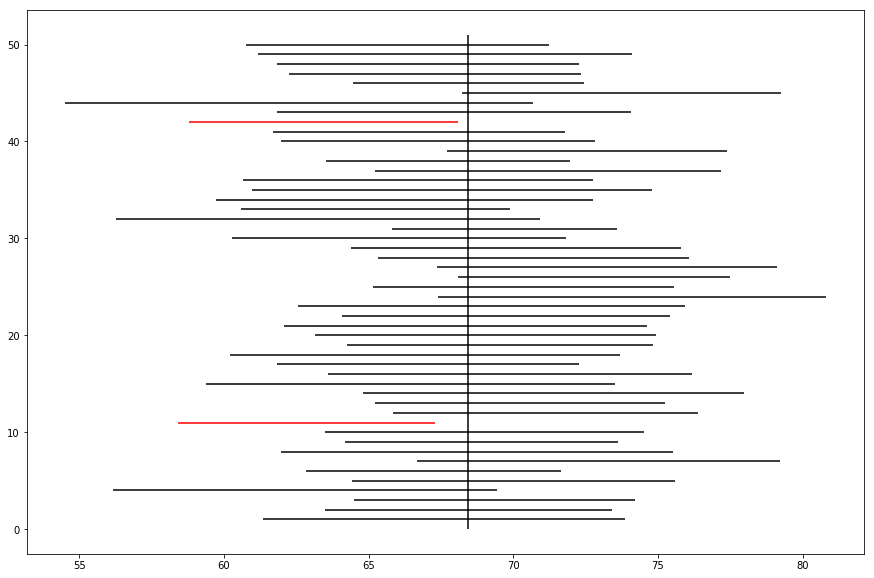

In [218]:
CI = .95
n_samples = 50
fig,ax = plt.subplots(1, 1, figsize=(15, 10))
ax.vlines(population_mean, 0, n_samples + 1)
samples_ = np.random.choice(population, (n_samples, SAMPLE_SIZE))
means = np.mean(samples_, axis=1)
sterrs = np.std(samples_, axis=1, ddof=1)
for i,(m,std) in enumerate(zip(means, sterrs)):
    ci = sps.norm.interval(CI)
    ci = m - np.array(ci) * (std / np.sqrt(SAMPLE_SIZE))
    ci = np.flip(ci)
    colors = ['black' if (population_mean >= ci[0] and population_mean <= ci[1]) else 'red']
    ax.hlines(len(means) - i, ci[0], ci[1], colors=colors)


## Interval Estimation of the Population Variance of a Normal Distribution

We will now consider the case where we only know that our samples obey a normal distribution, without knowing either the mean or variance. In the end, we want to get an answer in the form:

$$
P(* \leq \sigma^2 \leq *) = 0.95
$$

In order to get that, we need to transform the variance so that we get a known distribution.

For this, we will use the chi-square distribution. Recall that the chi-square distribution describes multiple samples of a normal distribution and is defined as:

$$
\chi^2(n) = \sum_i^n{Z_i^2} \text { where } Z_1, Z_2, ..., Z_n \sim N(0, 1)
$$

We also know that:

$$
\sigma^2 = \frac{1}{n}\sum_i^n{(X_i - \mu)^2} \\
s^2 = \frac{1}{n-1}\sum_i^n{(X_i - \overline{X})^2}
$$

If we calculate $s^2 / \sigma^2$, we get:

$$
\begin{aligned}
\frac{s^2}{\sigma^2} &= \frac{1}{n-1}\frac{\sum_i^n{(X_i - \overline{X})^2}}{\sigma^2} \\
&= \frac{1}{n-1}\sum_i^n{\bigg[ \frac{X_i - \overline{X}}{\sigma} \bigg]^2}
\end{aligned}
$$

We know that all $X_i \sim N(\mu, \sigma^2)$. The normal distribution has the property that:

$$
X \sim N(\mu, \sigma^2) \implies aX + b \sim N(a\mu + b, a^2\sigma^2)
$$

Since the $E(\overline{X}) = \mu$, we have:

$$
\frac{X_i - \overline{X}}{\sigma} \sim N(\frac{\mu - \mu}{\sigma}, \frac{\sigma^2}{\sigma^2}) = N(0, 1)
$$

Therefore, if we set:

$$
Z = \frac{X_i - \overline{X}}{\sigma}
$$

and plug it inside $s^2 / \sigma^2$, we get:

$$
(n-1)\frac{s^2}{\sigma^2} = \sum_i^n{Z_i^2}
$$

It is tempting to say that the above equation implies a $\chi^2(n)$ distribution, however, there is one final detail that needs to be addressed. That is, since only $n-1$ of the $X_i$s are independent (the final one being determined by everything preceding it), we need to subtract one degree of freedom from the above, which gives us the final result:

$$
Y = (n-1)\frac{s^2}{\sigma^2} \sim \chi^2(n-1)
$$

---
Now let us calculate $Y$ for each of the samples we prepared earlier:

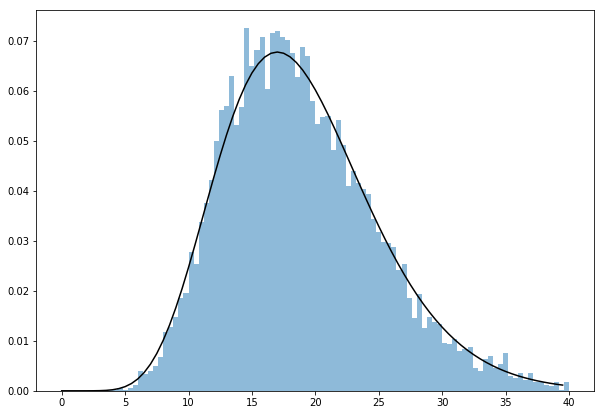

In [182]:
Y = (SAMPLE_SIZE - 1) * np.var(samples, axis=1, ddof=1) / population_variance
fig,ax = plt.subplots(1, 1, figsize=(10, 7))

ax.hist(Y, bins=100, range=(0, 40), density=True, alpha=.5)
xs = np.arange(0, 40, .5)
ax.plot(xs, sps.chi2(df=SAMPLE_SIZE-1).pdf(xs), color='black')

We can see that we do indeed get a $\chi^2(n-1)$ distribution. Now all that is left is to transform the probability interval so that it applies to $\sigma^2$.

First, we have:

$$
P(\chi^2_{0.975}(n-1) \leq Y \leq \chi^2_{0.025}(n-1)) = 0.95
$$

If we take the invert the inequality and multiply by $(n - 1)s^2$:

$$
P(\frac{(n-1)s^2}{\chi^2_{0.025}(n-1)} \leq \sigma^2 \leq \frac{(n-1)s^2}{\chi^2_{0.975}(n-1)}) = 0.95
$$

Therefore our interval is:

$$
\bigg[ \frac{(n-1)s^2}{\chi^2_{0.025}(n-1)} , \frac{(n-1)s^2}{\chi^2_{0.975}(n-1)}\bigg]
$$

---
Let us calculate a few confidence intervals again:

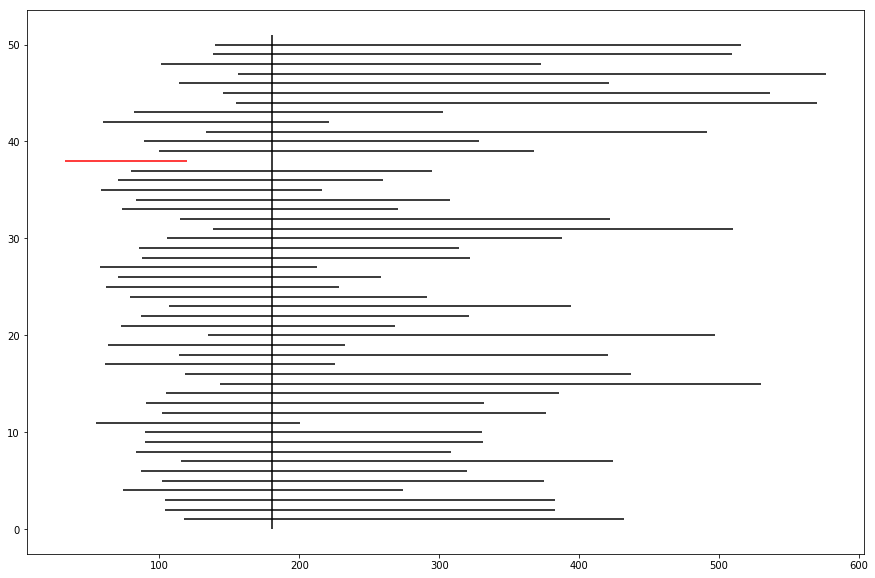

In [219]:
CI = .95
n_samples = 50
fig,ax = plt.subplots(1, 1, figsize=(15, 10))
ax.vlines(population_variance, 0, n_samples + 1)
samples_ = np.random.choice(population, (n_samples, SAMPLE_SIZE))
variances = np.var(samples_, axis=1)
for i,v in enumerate(variances):
    ci = (SAMPLE_SIZE - 1) * v / sps.chi2.interval(CI, SAMPLE_SIZE-1)
    ci = np.flip(ci)
    colors = ['black' if (population_variance >= ci[0] and population_variance <= ci[1]) else 'red']
    ax.hlines(len(means) - i, ci[0], ci[1], colors=colors)


## Interval Estimation of the Population Mean of a Normal Distribution Without Knowing The Variance

Previously we estimated the population mean using the standard error, however since we do not know the variance this time, we will have to use its estimator - the sample variance.

Here, we will use the t distribution. Recall that the t distribution is defined as:

$$
t = \frac{Z}{\sqrt{Y / n}}
$$

When we estimated the population mean before, we used the formula:

$$
Z = \frac{\overline{X} - \mu}{\sqrt{\sigma^2/n}}
$$

We want to use the sample variance instead of the population variance, however that would give us an error:

$$
t = Z\sqrt{\frac{\sigma^2}{s^2}}
$$

When estimating the population variance, we used:

$$
Y = (n-1)\frac{s^2}{\sigma^2}
$$

If we plug $Y$ into $t$, we get:

$$
t = \frac{Z}{\sqrt{Y / (n-1)}}
$$

We know<sup>**NEEDS PROOF**</sup> that $Y$ and $Z$ are independent of each other, which gives us the final condition for a t distribution with $n - 1$ degrees of freedom.

Knowing that, we can now normalize the inequalities to get an interval for $\mu$:

$$
P(t_{\alpha / 2}(n-1) \leq (\overline X - \mu) / \sqrt{\frac{s^2}{n}} \leq t_{1 - \alpha / 2}(n-1)) \\ 
= P(\overline{X}- t_{\alpha/2}(n-1)\frac{\sqrt{s^2}}{n} \leq \mu \leq \overline X - t_{a - \alpha/2}\sqrt{\frac{s^2}{n}}
$$

## Interval Estimation of Bernoulli Population Mean

Recall that the Bernoulli distribution is defined as:

$$
\begin{aligned}
f(x) &= p^x(1 - p)^{1-x} \\
\mu = E(X) &= p \\
\sigma^2 = V(X) &= p(1-p)
\end{aligned}
$$

We know that, the larger $n$ is, the more $\overline{X} \sim N(\mu, \sigma^2 / n)$ holds true for any distribution (Central Limit Theorem), which, for the Bernoulli distribution, becomes:

$$
\overline{X} \sim N(p, \frac{p(1-p)}{n})
$$

Therefore, for $Z = \frac{\overline{X} - p}{\sqrt{p(1-p) / n}} \sim N(0, 1)$, we have:

$$
P(N_{0.025} \leq Z \leq N_{0.975}) = 0.95
$$

Or, as an interval for $p$:

$$
P(\overline{X} - N_{0.025}\sqrt{\frac{p(1-p)}{n}} \leq p \leq \overline{X} - N_{0.975}\sqrt{\frac{p(1-p)}{n}}) = 0.95
$$

Now we substitute the left and right sides' $p$ with $\overline{X}$ <sup>TODO: Why?</sup> and we get:

$$
P(\overline{X} - N_{0.025}\sqrt{\frac{\overline X(1-\overline X)}{n}} \leq p \leq \overline{X} - N_{0.975}\sqrt{\frac{\overline X(1-\overline X)}{n}}) = 0.95
$$


Hence we have our confidence interval!

---
## Interval Estimation of Poisson Population Mean

We use the same principle as with the Bernoulli Distribution. We know that

$$
f(x) = \lambda e^{-\lambda x} \\
\mu = \lambda \\
\sigma^2 = \lambda
$$

Therefore, by utilizing the Central Limit Theorem, we get:

$$
\overline{X} \sim N(\lambda, \frac{\lambda}{n})
$$

which we can rewrite as:

$$
Z = (\overline{X} - \lambda)\sqrt{\frac{\lambda}{n}} \sim N(0, 1)
$$

The $95\%$ interval then looks like:

$$
0.95 \sim P(z_{0.975} \leq \frac{(\overline{X} - \lambda)\sqrt{\lambda}}{\sqrt{n}} \leq z_{0.025})
$$

which yields:

$$
P(\overline{X} - z_{0.025}\sqrt{\frac{\overline{X}}{n}} \leq \lambda \leq \overline{X} - z_{0.975}\sqrt{\frac{\overline{X}}{n}}
$$